# Aplicação 2: IDHM dos municípios brasileiros - Parte II

## Dataframe e Tratamentos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
main_df = pd.read_excel("brazil_cities.xlsx", skiprows=3)

In [7]:
main_df.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0
2,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0
3,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0
4,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0


In [15]:
df_regiao = pd.read_excel("brazil_cities.xlsx", sheet_name="De-Para_Estado_Regiao", skiprows=1)
df_regiao = df_regiao.drop(columns = ["Unnamed: 0"])

In [17]:
df_regiao.head()

,Estado,Região
0,AC,Norte
1,AL,Nordeste
2,AM,Norte
3,AP,Norte
4,BA,Nordeste


In [18]:
brazil_city = main_df.merge(df_regiao, on = "Estado", how="inner")

In [19]:
brazil_city.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Região
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,Sudeste
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,Sudeste
2,Barueri,SP,13818.0,0.790,0.791,0.708,177735.30,322.0,Sudeste
3,Santos,SP,15666.0,0.840,0.861,0.807,50544.73,569.0,Sudeste
4,Campinas,SP,46027.0,0.805,0.829,0.731,49876.62,1508.0,Sudeste


## Exploração

- h) A renda anual per capita (por pessoa) pode ser analisada pela variável GDP_Capita. O atual presidente, concorrente do candidato que  você está auxiliando, disse em entrevista que “a maioria dos brasileiros tem uma renda anual superior a 21 mil”. Como você avalia essa frase?

In [34]:
brazil_city[["GDP_CAPITA"]].describe().T

,count,mean,std,min,25%,50%,75%,max
GDP_CAPITA,5573.0,21129.767244,20327.836119,3190.57,9061.72,15879.96,26156.99,314637.69


In [39]:
brazil_city[["GDP_CAPITA"]].median()

GDP_CAPITA    15879.96
dtype: float64

- i) O IDHM_Renda é outra variável na qual podemos avaliar a situação da renda dos habitantes de cada município. Ela tem relação com o GDP_Capita?

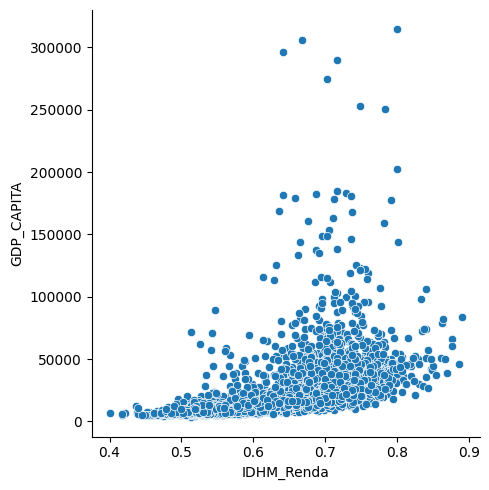

In [48]:
sns.relplot(y = brazil_city["GDP_CAPITA"], x = brazil_city["IDHM_Renda"])

In [49]:
brazil_city["GDP_CAPITA"].corr(brazil_city["IDHM_Renda"])

0.5265639466976222

- j) Considerando ainda o IDHM_Renda, qual a análise dessa variável por região?


- k) Conclua traçando o perfil de renda per capita dos municípios do Brasil e quais propostas faria para essa área.
